In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import classification_report, confusion_matrix

from utils.new_pred_utils import predict
from utils.evaluate_predictions import show_metrics

from utils.instructions import claude_instructions_v505
MODEL_ID = "anthropic.claude-3-5-sonnet-20241022-v2:0"
SYSTEM_PROMPT = claude_instructions_v505

In [2]:
df = pd.read_csv("../experiments_501/data/output_dataset.csv")
df.head()

,citing_cluster_id,citing_decision_name,citing_url,citing_opinions,citing_filenames,cited_cluster_id,cited_decision_name,cited_url,cited_name_short,cited_name,cited_name_full,cited_citations,overruled,note,use_full_opinion,filename
0,91306,"Morgan v. United States,113 U.S. 476 (1885)",https://www.courtlistener.com/opinion/91306/mo...,"[{'opinion_id': 91306, 'opinion_api': 'https:/...",['91306_010combined.txt'],88061,Texas v. White (1869),https://www.courtlistener.com/opinion/88061/te...,White,Texas v. White,Texas v. White Et Al.,"['74 U.S. 700', '19 L. Ed. 227', '7 Wall. 700'...",yes,NaN,0,0001.91306_cites_88061.txt
1,91306,"Morgan v. United States,113 U.S. 476 (1885)",https://www.courtlistener.com/opinion/91306/mo...,"[{'opinion_id': 91306, 'opinion_api': 'https:/...",['91306_010combined.txt'],88994,Vermilye & Co. v. Adams Express Co. (1875),https://www.courtlistener.com/opinion/88994/ve...,NaN,Vermilye & Co. v. Adams Express Co.,Vermilye & Co. v. Adams Express Company,"['88 U.S. 138', '22 L. Ed. 609', '21 Wall. 138...",no,NaN,0,0002.91306_cites_88994.txt
2,91306,"Morgan v. United States,113 U.S. 476 (1885)",https://www.courtlistener.com/opinion/91306/mo...,"[{'opinion_id': 91306, 'opinion_api': 'https:/...",['91306_010combined.txt'],87633,Murray v. Lardner (1865),https://www.courtlistener.com/opinion/87633/mu...,Murray,Murray v. Lardner,Murray v. Lardner,"['69 U.S. 110', '17 L. Ed. 857', '2 Wall. 110'...",no,NaN,0,0003.91306_cites_87633.txt
3,91306,"Morgan v. United States,113 U.S. 476 (1885)",https://www.courtlistener.com/opinion/91306/mo...,"[{'opinion_id': 91306, 'opinion_api': 'https:/...",['91306_010combined.txt'],88240,Texas v. Hardenberg (1869),https://www.courtlistener.com/opinion/88240/te...,Hardenberg,Texas v. Hardenberg,Texas v. Hardenberg,"['77 U.S. 68', '19 L. Ed. 839', '10 Wall. 68',...",no,NaN,0,0004.91306_cites_88240.txt
4,91306,"Morgan v. United States,113 U.S. 476 (1885)",https://www.courtlistener.com/opinion/91306/mo...,"[{'opinion_id': 91306, 'opinion_api': 'https:/...",['91306_010combined.txt'],88693,Huntington v. Texas (1873),https://www.courtlistener.com/opinion/88693/hu...,Huntington,Huntington v. Texas,Huntington v. Texas; Texas v. Huntington,"['83 U.S. 402', '21 L. Ed. 316', '16 Wall. 402...",no,NaN,0,0005.91306_cites_88693.txt


In [3]:
citing_dict = df[['citing_cluster_id', 'citing_decision_name', 'citing_opinions', 'citing_filenames']].drop_duplicates().set_index('citing_cluster_id')[['citing_decision_name', 'citing_filenames']].to_dict(orient='index')
len(citing_dict.keys())

133

In [4]:
cited_dict = {}

citations_df = df[['citing_cluster_id', 'cited_cluster_id',
       'cited_decision_name', 'cited_name_short', 'cited_name',
       'cited_name_full', 'cited_citations']]

for _, row in citations_df.iterrows():
    citing = row['citing_cluster_id']
    cited = row['cited_cluster_id']
    
    # Extract metadata (everything except citing and cited IDs)
    metadata = row.drop(labels=['citing_cluster_id', 'cited_cluster_id']).to_dict()
    
    if citing not in cited_dict:
        cited_dict[citing] = {}
    
    cited_dict[citing][cited] = metadata
    
len(cited_dict.keys())

133

In [5]:
%%time

file_path = "../experiments_501/data/raw_citing_opinions"
raw_results_df, parsed_results_df = predict(citing_dict, cited_dict, model_id=MODEL_ID, system_prompt=SYSTEM_PROMPT, data_folder=file_path)

INFO:botocore.tokens:Loading cached SSO token for flp-sso
INFO:botocore.tokens:Loading cached SSO token for flp-sso
INFO:root:Processed 1: citing_id 92291
INFO:root:Processed 2: citing_id 93311
INFO:root:Processed 3: citing_id 93904
INFO:root:Processed 4: citing_id 91306
INFO:root:Processed 5: citing_id 92059
INFO:root:Processed 6: citing_id 98124
INFO:root:Processed 7: citing_id 101368
INFO:root:Processed 8: citing_id 98917
INFO:root:Processed 9: citing_id 99004
INFO:root:Processed 10: citing_id 99901
INFO:root:Processed 11: citing_id 101913
INFO:root:Processed 12: citing_id 101750
INFO:root:Processed 13: citing_id 102784
INFO:root:Processed 14: citing_id 103012
INFO:root:Processed 15: citing_id 103214
INFO:root:Processed 16: citing_id 102164
INFO:root:Processed 17: citing_id 103172
INFO:root:Processed 18: citing_id 103292
INFO:root:Processed 19: citing_id 103290
INFO:root:Processed 20: citing_id 103557
INFO:root:Processed 21: citing_id 103198
INFO:root:Processed 22: citing_id 103351


CPU times: user 10.6 s, sys: 1.61 s, total: 12.2 s
Wall time: 10min 52s


In [6]:
raw_results_df

,citing_cluster_id,model,input_tokens,output_tokens,raw_results
0,92291,anthropic.claude-3-5-sonnet-20241022-v2:0,7304,636,"```json\n{\n ""88699"": {\n ""cited_decision""..."
1,93311,anthropic.claude-3-5-sonnet-20241022-v2:0,15577,629,"{\n ""92988"": {\n ""cited_decision"": ""Merril..."
2,93904,anthropic.claude-3-5-sonnet-20241022-v2:0,5814,800,"```json\n{\n ""93354"": {\n ""cited_decision""..."
3,91306,anthropic.claude-3-5-sonnet-20241022-v2:0,12032,985,"{\n ""88061"": {\n ""cited_decision"": ""Texas ..."
4,92059,anthropic.claude-3-5-sonnet-20241022-v2:0,19389,973,"{\n ""91368"": {\n ""cited_decision"": ""Poinde..."
...,...,...,...,...,...
128,118230,anthropic.claude-3-5-sonnet-20241022-v2:0,17277,616,"{\n ""104079"": {\n ""cited_decision"": ""House..."
129,118428,anthropic.claude-3-5-sonnet-20241022-v2:0,13430,578,"{\n ""99610"": {\n ""cited_decision"": ""Evans ..."
130,118386,anthropic.claude-3-5-sonnet-20241022-v2:0,62030,1058,"{\n118133: {\n ""cited_decision"": ""Agostini v...."
131,118317,anthropic.claude-3-5-sonnet-20241022-v2:0,27465,1226,"{\n ""118011"": {\n ""cited_decision"": ""Semin..."


In [7]:
parsed_results_df = parsed_results_df.rename(columns={'overruled': 'prediction'})
parsed_results_df

,citing_cluster_id,cited_cluster_id,cited_decision,prediction,quote,rationale
0,92291,88699,Osborne v. Mobile,yes,In view of the course of decisions which have ...,The Acting Decision explicitly states that Osb...
1,92291,89664,Pensacola Telegraph Co. v. Western Union Teleg...,no,In the case of The Pensacola Telegraph Company...,The Acting Decision cites and relies on this c...
2,92291,90600,Telegraph Co. v. Texas,no,"In Western Union Telegraph Company v. Texas, 1...",The Acting Decision cites and follows this cas...
3,92291,91869,Robbins v. Shelby County Taxing District,no,It comes plainly within the principle of the d...,The Acting Decision relies on and applies this...
4,92291,91985,Philadelphia & Southern Steamship Co. v. Penns...,no,It comes plainly within the principle of the d...,The Acting Decision cites and follows this cas...
...,...,...,...,...,...,...
901,118273,2261846,Mille Lacs Band of Chippewa Indians v. Minneso...,no,"After a bench trial on the Phase I issues, the...",The Acting Decision reviews and affirms this l...
902,118273,105018,Youngstown Sheet & Tube Co. v. Sawyer,no,The Court of Appeals began its analysis of thi...,The Acting Decision cites Youngstown as valid ...
903,118273,98773,New York Ex Rel. Kennedy v. Becker,no,The Court characterized the Senecas' claim as ...,"While the Acting Decision discusses Kennedy, i..."
904,118273,103642,Tulee v. Washington,no,The conservation necessity standard appears to...,The Acting Decision discusses Tulee as valid p...


In [8]:
raw_results_df["input_tokens"].sum()

np.int64(2431842)

In [9]:
raw_results_df["output_tokens"].sum()

np.int64(129902)

In [10]:
raw_results_df.to_csv("predictions/raw_results.csv", index=False)
parsed_results_df.to_csv("predictions/parsed_results_df.csv", index=False)

In [11]:
parsed_results_df["prediction"].isna().sum()

np.int64(0)

In [12]:
raw_results_df["citing_cluster_id"].nunique()

133

In [13]:
parsed_results_df["citing_cluster_id"].nunique()

120

In [25]:
errored_citing_ids = set(raw_results_df["citing_cluster_id"].unique()) - set(parsed_results_df["citing_cluster_id"].unique())
errored_citing_ids

{np.int64(103442),
 np.int64(103869),
 np.int64(103870),
 np.int64(105525),
 np.int64(107748),
 np.int64(108990),
 np.int64(109532),
 np.int64(112640),
 np.int64(112906),
 np.int64(117947),
 np.int64(118023),
 np.int64(118133),
 np.int64(118386)}

In [62]:
import ast

errored_parsed_results = {}

for each in errored_citing_ids:
    result = raw_results_df[raw_results_df["citing_cluster_id"] == each]["raw_results"].iloc[0]
    errored_parsed_results[int(each)] = ast.literal_eval(result)

errored_parsed_results

{112640: {111020: {'cited_decision': 'Michigan v. Long',
   'overruled': 'no',
   'quote': 'We now make it explicit: In all cases in which a state prisoner has defaulted his federal claims in state court pursuant to an independent and adequate state procedural rule, federal habeas review of the claims is barred unless the prisoner can demonstrate cause for the default and actual prejudice',
   'rationale': "The Acting Decision builds upon and refines Long's presumption rather than overruling it. It limits Long's application but does not reject its core holding."},
  112205: {'cited_decision': 'Harris v. Reed',
   'overruled': 'no',
   'quote': 'Coleman reads Harris too broadly. A predicate to the application of the Harris presumption is that the decision of the last state court to which the petitioner presented his federal claims must fairly appear to rest primarily on federal law or to be interwoven with federal law.',
   'rationale': "The Acting Decision clarifies and limits Harris's

In [63]:
def get_parsed_results_df(predictions):
    parsed_results = []
    for citing_cluster_id, info in predictions.items():
        for cited_cluster_id, cited_info in info.items():
            parsed_results.append(
                {
                    "citing_cluster_id": citing_cluster_id,
                    "cited_cluster_id": cited_cluster_id,
                    "cited_decision": cited_info.get("cited_decision", ""),
                    "overruled": cited_info.get("overruled", ""),
                    "quote": cited_info.get("quote", ""),
                    "rationale": cited_info.get("rationale", ""),
                }
            )
    return pd.DataFrame(parsed_results)

errored_results_df = get_parsed_results_df(errored_parsed_results)
errored_results_df

,citing_cluster_id,cited_cluster_id,cited_decision,overruled,quote,rationale
0,112640,111020,Michigan v. Long,no,We now make it explicit: In all cases in which...,The Acting Decision builds upon and refines Lo...
1,112640,112205,Harris v. Reed,no,Coleman reads Harris too broadly. A predicate ...,The Acting Decision clarifies and limits Harri...
2,112640,109717,Wainwright v. Sykes,no,Our cases since Sykes have been unanimous in a...,The Acting Decision reinforces and builds upon...
3,112640,106548,Fay v. Noia,yes,We now make it explicit: In all cases in which...,The Acting Decision explicitly overrules Fay's...
4,112640,105074,Brown v. Allen,no,"In Daniels v. Allen, the companion case to Bro...",The Acting Decision cites Brown as precedent a...
...,...,...,...,...,...,...
152,103870,1303501,Shoemaker v. Keely,no,,"While listed in the metadata, this case is not..."
153,103870,101011,"Farrington, Governor v. T. Tokushige",no,the state has no right to bring such schools '...,The case is cited as supporting precedent with...
154,103870,99296,Schenck v. United States,no,"Schenck v. United States, 249 U.S. 47, 52",The case is cited as precedent regarding clear...
155,103870,103795,Helvering v. Griffiths,no,See authorities cited in Helvering v. Griffith...,The case is cited only for its authorities wit...


In [64]:
errored_results_df = errored_results_df.rename(columns={'overruled': 'prediction'})

In [65]:
assert parsed_results_df.columns.all() == errored_results_df.columns.all()

In [66]:
prediction_df = pd.concat([parsed_results_df, errored_results_df], ignore_index=True)
prediction_df

,citing_cluster_id,cited_cluster_id,cited_decision,prediction,quote,rationale
0,92291,88699,Osborne v. Mobile,yes,In view of the course of decisions which have ...,The Acting Decision explicitly states that Osb...
1,92291,89664,Pensacola Telegraph Co. v. Western Union Teleg...,no,In the case of The Pensacola Telegraph Company...,The Acting Decision cites and relies on this c...
2,92291,90600,Telegraph Co. v. Texas,no,"In Western Union Telegraph Company v. Texas, 1...",The Acting Decision cites and follows this cas...
3,92291,91869,Robbins v. Shelby County Taxing District,no,It comes plainly within the principle of the d...,The Acting Decision relies on and applies this...
4,92291,91985,Philadelphia & Southern Steamship Co. v. Penns...,no,It comes plainly within the principle of the d...,The Acting Decision cites and follows this cas...
...,...,...,...,...,...,...
1058,103870,1303501,Shoemaker v. Keely,no,,"While listed in the metadata, this case is not..."
1059,103870,101011,"Farrington, Governor v. T. Tokushige",no,the state has no right to bring such schools '...,The case is cited as supporting precedent with...
1060,103870,99296,Schenck v. United States,no,"Schenck v. United States, 249 U.S. 47, 52",The case is cited as precedent regarding clear...
1061,103870,103795,Helvering v. Griffiths,no,See authorities cited in Helvering v. Griffith...,The case is cited only for its authorities wit...


In [67]:
set(df["citing_cluster_id"].unique()) - set(prediction_df["citing_cluster_id"].unique())

set()

In [68]:
prediction_df.to_csv("predictions/prediction_df.csv", index=False)

In [115]:
df['citing_cluster_id'] = df['citing_cluster_id'].astype(int)
df['cited_cluster_id'] = df['cited_cluster_id'].astype(int)

prediction_df['citing_cluster_id'] = prediction_df['citing_cluster_id'].astype(int)
prediction_df['cited_cluster_id'] = prediction_df['cited_cluster_id'].astype(int)

In [122]:
eval_df = df.merge(prediction_df, on=["citing_cluster_id", "cited_cluster_id"], how="left")
eval_df

,citing_cluster_id,citing_decision_name,citing_url,citing_opinions,citing_filenames,cited_cluster_id,cited_decision_name,cited_url,cited_name_short,cited_name,cited_name_full,cited_citations,overruled,note,use_full_opinion,filename,cited_decision,prediction,quote,rationale
0,91306,"Morgan v. United States,113 U.S. 476 (1885)",https://www.courtlistener.com/opinion/91306/mo...,"[{'opinion_id': 91306, 'opinion_api': 'https:/...",['91306_010combined.txt'],88061,Texas v. White (1869),https://www.courtlistener.com/opinion/88061/te...,White,Texas v. White,Texas v. White Et Al.,"['74 U.S. 700', '19 L. Ed. 227', '7 Wall. 700'...",yes,NaN,0,0001.91306_cites_88061.txt,Texas v. White (1869),yes,The position there taken that the legislature ...,The Acting Decision explicitly states that thi...
1,91306,"Morgan v. United States,113 U.S. 476 (1885)",https://www.courtlistener.com/opinion/91306/mo...,"[{'opinion_id': 91306, 'opinion_api': 'https:/...",['91306_010combined.txt'],88994,Vermilye & Co. v. Adams Express Co. (1875),https://www.courtlistener.com/opinion/88994/ve...,NaN,Vermilye & Co. v. Adams Express Co.,Vermilye & Co. v. Adams Express Company,"['88 U.S. 138', '22 L. Ed. 609', '21 Wall. 138...",no,NaN,0,0002.91306_cites_88994.txt,Vermilye & Co. v. Adams Express Co. (1875),no,We have not quoted the language from the opini...,While the Acting Decision questions and expres...
2,91306,"Morgan v. United States,113 U.S. 476 (1885)",https://www.courtlistener.com/opinion/91306/mo...,"[{'opinion_id': 91306, 'opinion_api': 'https:/...",['91306_010combined.txt'],87633,Murray v. Lardner (1865),https://www.courtlistener.com/opinion/87633/mu...,Murray,Murray v. Lardner,Murray v. Lardner,"['69 U.S. 110', '17 L. Ed. 857', '2 Wall. 110'...",no,NaN,0,0003.91306_cites_87633.txt,Murray v. Lardner (1865),no,"The rules established in Murray v. Lardner, 2 ...",The Acting Decision explicitly reaffirms Murra...
3,91306,"Morgan v. United States,113 U.S. 476 (1885)",https://www.courtlistener.com/opinion/91306/mo...,"[{'opinion_id': 91306, 'opinion_api': 'https:/...",['91306_010combined.txt'],88240,Texas v. Hardenberg (1869),https://www.courtlistener.com/opinion/88240/te...,Hardenberg,Texas v. Hardenberg,Texas v. Hardenberg,"['77 U.S. 68', '19 L. Ed. 839', '10 Wall. 68',...",no,NaN,0,0004.91306_cites_88240.txt,Texas v. Hardenberg (1869),no,The case came before the court again in anothe...,While the Acting Decision discusses Hardenberg...
4,91306,"Morgan v. United States,113 U.S. 476 (1885)",https://www.courtlistener.com/opinion/91306/mo...,"[{'opinion_id': 91306, 'opinion_api': 'https:/...",['91306_010combined.txt'],88693,Huntington v. Texas (1873),https://www.courtlistener.com/opinion/88693/hu...,Huntington,Huntington v. Texas,Huntington v. Texas; Texas v. Huntington,"['83 U.S. 402', '21 L. Ed. 316', '16 Wall. 402...",no,NaN,0,0005.91306_cites_88693.txt,Huntington v. Texas (1873),no,"The same questions, as to part of the same iss...",The Acting Decision discusses Huntington but d...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1094,118273,Minnesota v. Mille Lacs Band of Chippewa India...,https://www.courtlistener.com/opinion/118273/m...,"[{'opinion_id': 9433771, 'opinion_api': 'https...","['118273_020lead.txt', '118273_040dissent.txt'...",2261846,Mille Lacs Band of Chippewa Indians v. Minneso...,https://www.courtlistener.com/opinion/2261846/...,NaN,Mille Lacs Band of Chippewa Indians v. Minnesota,"MILLE LACS BAND OF CHIPPEWA INDIANS, Arthur Ga...","['861 F. Supp. 784', '1994 U.S. Dist. LEXIS 11...",no,NaN,0,1095.118273_cites_2261846.txt,Mille Lacs Band of Chippewa Indians v. Minneso...,no,"After a bench trial on the Phase I issues, the...",The Acting Decision reviews and affirms this l...
1095,118273,Minnesota v. Mille Lacs Band of Chippewa India...,https://www.courtlistener.com/opinion/118273/m...,"[{'opinion_id': 9433771, 'opinion_api': 'https...","['118273_020lead.txt', '118273_040dissent.txt'...",105018,Youngstown Sheet

In [123]:
assert len(df) == len(eval_df)

In [124]:
eval_df[eval_df["prediction"].isna()]

,citing_cluster_id,citing_decision_name,citing_url,citing_opinions,citing_filenames,cited_cluster_id,cited_decision_name,cited_url,cited_name_short,cited_name,cited_name_full,cited_citations,overruled,note,use_full_opinion,filename,cited_decision,prediction,quote,rationale
84,101913,"Fox Film Corp. v. Doyal,286 U.S. 123 (1932)",https://www.courtlistener.com/opinion/101913/f...,"[{'opinion_id': 101913, 'opinion_api': 'https:...",['101913_010combined.txt'],89542,Forbes v. Gracey (1877),https://www.courtlistener.com/opinion/89542/fo...,Forbes,Forbes v. Gracey,Forbes v. Gracey,"['94 U.S. 762', '24 L. Ed. 313', '1876 U.S. LE...",no,NaN,0,0085.101913_cites_89542.txt,NaN,NaN,NaN,NaN
85,101913,"Fox Film Corp. v. Doyal,286 U.S. 123 (1932)",https://www.courtlistener.com/opinion/101913/f...,"[{'opinion_id': 101913, 'opinion_api': 'https:...",['101913_010combined.txt'],99943,Irwin v. Wright (1922),https://www.courtlistener.com/opinion/99943/ir...,Irwin,Irwin v. Wright,"Irwin v. Wright, County Treasurer of Maricopa ...","['258 U.S. 219', '42 S. Ct. 293', '66 L. Ed. 5...",no,NaN,0,0086.101913_cites_99943.txt,NaN,NaN,NaN,NaN
86,101913,"Fox Film Corp. v. Doyal,286 U.S. 123 (1932)",https://www.courtlistener.com/opinion/101913/f...,"[{'opinion_id': 101913, 'opinion_api': 'https:...",['101913_010combined.txt'],101632,Willcutts v. Bunn (1931),https://www.courtlistener.com/opinion/101632/w...,Willcutts,Willcutts v. Bunn,"Willcuts, Collector of Internal Revenue, v. Bunn","['282 U.S. 216', '51 S. Ct. 125', '75 L. Ed. 3...",no,NaN,0,0087.101913_cites_101632.txt,NaN,NaN,NaN,NaN
87,101913,"Fox Film Corp. v. Doyal,286 U.S. 123 (1932)",https://www.courtlistener.com/opinion/101913/f...,"[{'opinion_id': 101913, 'opinion_api': 'https:...",['101913_010combined.txt'],96768,Elder v. Wood (1908),https://www.courtlistener.com/opinion/96768/el...,Elder,Elder v. Wood,Elder v. Wood,"['208 U.S. 226', '28 S. Ct. 263', '52 L. Ed. 4...",no,NaN,0,0088.101913_cites_96768.txt,NaN,NaN,NaN,NaN
88,101913,"Fox Film Corp. v. Doyal,286 U.S. 123 (1932)",https://www.courtlistener.com/opinion/101913/f...,"[{'opinion_id': 101913, 'opinion_api': 'https:...",['101913_010combined.txt'],101762,Indian Motocycle Co. v. United States (1931),https://www.courtlistener.com/opinion/101762/i...,NaN,Indian Motocycle Co. v. United States,Indian Motocycle Co. v. United States,"['283 U.S. 570', '51 S. Ct. 601', '75 L. Ed. 1...",no,NaN,0,0089.101913_cites_101762.txt,NaN,NaN,NaN,NaN
89,101913,"Fox Film Corp. v. Doyal,286 U.S. 123 (1932)",https://www.courtlistener.com/opinion/101913/f...,"[{'opinion_id': 101913, 'opinion_api': 'https:...",['101913_010combined.txt'],101894,Burnet v. Coronado Oil & Gas Co. (1932),https://www.courtlistener.com/opinion/101894/b...,Burnet,Burnet v. Coronado Oil & Gas Co.,NaN,"['285 U.S. 393', '52 S. Ct. 443', '76 L. Ed. 8...",no,cited opinion has multiple matches,1,0090.101913_cites_101894.txt,NaN,NaN,NaN,NaN
90,101913,"Fox Film Corp. v. Doyal,286 U.S. 123 (1932)",https://www.courtlistener.com/opinion/101913/f...,"[{'opinion_id': 101913, 'opinion_api': 'https:...",['101913_010combined.txt'],99339,Union Oil Co. of Cal. v. Smith (1919),https://www.courtlistener.com/opinion/99339/un...,NaN,Union Oil Co. of Cal. v. Smith,Union Oil Company of California v. Smith,"['249 U.S. 337', '39 S. Ct. 308', '63 L. Ed. 6...",no,NaN,0,0091.101913_cites_99339.txt,NaN,NaN,NaN,NaN
91,101913,"Fox Film Corp. v. Doyal,286 U.S. 123 (1932)",https://www.courtlistener.com/opinion/101913/f...,"[{'opinion_id': 101913, 'opinion_api': 'https:...",['101913_010combined.txt'],92685,Wisconsin Central Railroad v. Price County (1890),https://www.courtlistener.com/opinion/92685/wi...,NaN,Wisconsin Central Railroad v. Price County,Wisconsin Central Railroad Company v. Price Co...,"['133 U.S. 496', '10 S. Ct. 341', '33 L. Ed. 6...",no,NaN,0,0092.101913_cites_92685.txt,NaN,NaN,NaN,NaN
92,101913,"Fox Film Corp. v. Doyal,286 U.S. 123 (1932)",https://www.courtlistener.com/opinion/101913/f...,"[{'opinion_id': 101913,

In [126]:
list(eval_df[eval_df["prediction"].isna()]["citing_cluster_id"].unique())

[np.int64(101913)]

In [127]:
eval_df.loc[eval_df['citing_cluster_id'] == 101913, 'prediction'] = 'no'
eval_df.loc[eval_df['citing_cluster_id'] == 101913, 'rationale'] = 'All other cited decisions were neither explicitly nor implicitly overruled by the Acting Decision - they were merely cited as supporting authority or distinguished.'

In [130]:
assert eval_df["prediction"].isna().sum() == 0

# Save the evaluation df

In [131]:
eval_df.to_csv("predictions/eval_df.csv", index=False)

# Run evaluation

In [132]:
df["overruled"].value_counts()

overruled
no     938
yes    161
Name: count, dtype: int64

In [133]:
eval_df["overruled"].value_counts()

overruled
no     938
yes    161
Name: count, dtype: int64

In [134]:
eval_df["prediction"].value_counts()

prediction
no     912
yes    187
Name: count, dtype: int64

In [136]:
y_true = eval_df["overruled"].map({"yes": 1, "no": 0})
y_pred = eval_df["prediction"].map({"yes": 1, "no": 0})

In [137]:
report = classification_report(y_true, y_pred, target_names=["No", "Yes"])
print(report)

              precision    recall  f1-score   support

          No       0.99      0.96      0.98       938
         Yes       0.81      0.94      0.87       161

    accuracy                           0.96      1099
   macro avg       0.90      0.95      0.92      1099
weighted avg       0.96      0.96      0.96      1099



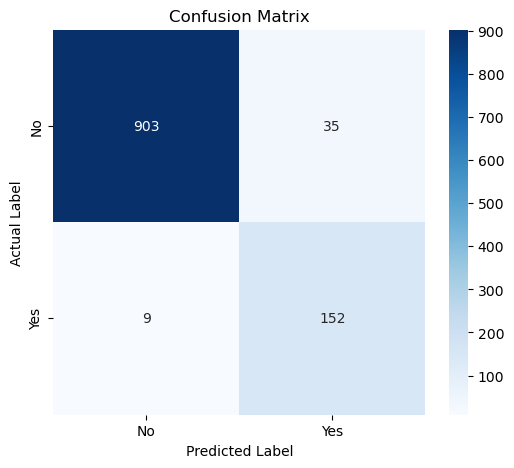

In [138]:
# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix using seaborn
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix")
plt.show()

In [139]:
show_metrics(cm, y_true)

precision: of all predicted positives, how many were actual positives
recall: of all actual positives, how many we predicted to be positives
---------
METRICS
Accuracy: 0.96
Precision: 0.81
Recall: 0.94
F-score: 0.87
Specificity: 0.96
---------
DATASET
Total Responses: 1099
Total Positives: 161
Total Negatives: 938
---------
RECOUNT
True positives: 152
True negatives: 903
False positives: 35
False negatives: 9
